# Text Analysis from SICSS

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare the data</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Install-packages" data-toc-modified-id="Install-packages-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Install packages</a></span></li><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Load packages</a></span></li></ul></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-data-format" data-toc-modified-id="Look-at-the-data-format-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Look at the data format</a></span></li><li><span><a href="#Look-at-individual-column-values" data-toc-modified-id="Look-at-individual-column-values-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Look at individual column values</a></span></li><li><span><a href="#Convert-timestamps" data-toc-modified-id="Convert-timestamps-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Convert timestamps</a></span></li></ul></li><li><span><a href="#Format-and-clean-the-text" data-toc-modified-id="Format-and-clean-the-text-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Format and clean the text</a></span><ul class="toc-item"><li><span><a href="#Filter-out-retweets-and-replace-urls" data-toc-modified-id="Filter-out-retweets-and-replace-urls-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Filter out retweets and replace urls</a></span></li><li><span><a href="#Tokenize-the-data" data-toc-modified-id="Tokenize-the-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Tokenize the data</a></span></li><li><span><a href="#Remove-stopwords" data-toc-modified-id="Remove-stopwords-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Remove stopwords</a></span></li><li><span><a href="#Remove-punctuation" data-toc-modified-id="Remove-punctuation-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Remove punctuation</a></span></li><li><span><a href="#Convert-to-lowercase" data-toc-modified-id="Convert-to-lowercase-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Convert to lowercase</a></span></li><li><span><a href="#Remove-extra-white-spaces" data-toc-modified-id="Remove-extra-white-spaces-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Remove extra white spaces</a></span></li><li><span><a href="#Stemming" data-toc-modified-id="Stemming-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Stemming</a></span></li></ul></li></ul></li><li><span><a href="#Word-counting" data-toc-modified-id="Word-counting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word counting</a></span><ul class="toc-item"><li><span><a href="#WordCloud" data-toc-modified-id="WordCloud-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>WordCloud</a></span></li><li><span><a href="#Bigrams-and-n-grams" data-toc-modified-id="Bigrams-and-n-grams-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bigrams and n-grams</a></span></li><li><span><a href="#tf-idf:-Term-Frequency-Inverse-Document-Frequency" data-toc-modified-id="tf-idf:-Term-Frequency-Inverse-Document-Frequency-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>tf-idf: Term Frequency Inverse Document Frequency</a></span></li></ul></li><li><span><a href="#Dictionary-based-text-analysis" data-toc-modified-id="Dictionary-based-text-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dictionary-based text analysis</a></span><ul class="toc-item"><li><span><a href="#Selecting-for-a-collection-of-words" data-toc-modified-id="Selecting-for-a-collection-of-words-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Selecting for a collection of words</a></span></li><li><span><a href="#Sentiment-analysis" data-toc-modified-id="Sentiment-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sentiment analysis</a></span></li></ul></li></ul></div>

We will step through loading and cleaning a collection of trump tweets from 2017-2018 for text analysis. In this session, we will look at word counting and dictionary-based text analysis methods.

- Prepare the data
    - Setup
    - Load the data
    - Format and clean the data
- Word counting
    - Wordclouds 
    - tf-idf: Term frequency inverse document frequency
- Dictionary based methods
    - Topic-based dictionary
    - Sentiment analysis 

___Some technical details:___

This session is a [Binder](https://mybinder.org/) instance of a [Jupyter notebook](https://jupyter.org/) 

To run a code block, click the gray box and press shift+enter

## Prepare the data

### Setup 
#### Install packages
We only need to install packages once - they have already been installed here.
- *tidyverse*
    - *dyplr* for dataframe manipulation
    - *tidyr* for formatting into tidy data
    - *ggplot2* for plotting
    - *lubridate* for working with dates and times
- *tidytext* for getting text data into a tidy format
- *SnowballC* for getting word stems
- *stringr* for manipulating strings
- *wordcloud* for generating word clouds

In the R console, 
```
install.packages("tidyverse")
install.packages("tidytext")
install.packages("SnowballC")
install.packages("stringr")
install.packages("wordcloud")
```


#### Load packages

In [164]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(tidytext)
library(SnowballC)
library(stringr)
library(wordcloud)

### Load the data
We will look at Trump's tweets collected between 2017-02-05 and 2018-05-18. 

This data is in the format that would be returned using an API call using the *rtweet* package.

In [165]:
load(url("https://cbail.github.io/Trump_Tweets.Rdata"))

## if the file is not available, download a local copy
# load(file = "trumptweets.Rdata")

#### Look at the data format
Preview the data we loaded, which is named ```trumptweets```.

You can change the number in 
```head(trumptweets, #) ```
for the number of rows you want to see.

- `created_at` contains the timestamp of the tweet

- `text` contains the tweet

In [166]:
# preview trumptweets
head(trumptweets,5)

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,⋯,retweet_text,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
997577906007298048,2018-05-18 20:41:21,25073877,realDonaldTrump,"Just met with UN Secretary-General António Guterres who is working hard to “Make the United Nations Great Again.” When the UN does more to solve conflicts around the world, it means the U.S. has less to do and we save money. @NikkiHaley is doing a fantastic job! https://t.co/pqUv6cyH2z",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997573139663028224,2018-05-18 20:22:25,25073877,realDonaldTrump,America is a Nation that believes in the power of redemption. America is a Nation that believes in second chances - and America is a Nation that believes that the best is always yet to come! #PrisonReform https://t.co/Yk5UJUYgHN,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997568208369577985,2018-05-18 20:02:49,25073877,realDonaldTrump,RT @SteveForbesCEO: .@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middl…,Twitter for iPhone,NA,NA,NA,FALSE,⋯,".@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middlemen like Pharmacy Benefit Managers, insurers &amp; hospitals would do well by passing discounts on to patients. @SecAzar @SGottliebFDA https://t.co/mfRQ5COtev",NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997515759281680385,2018-05-18 16:34:24,25073877,realDonaldTrump,"We grieve for the terrible loss of life, and send our support and love to everyone affected by this horrible attack in Texas. To the students, families, teachers and personnel at Santa Fe High School – we are with you in this tragic hour, and we will be with you forever... https://t.co/LtJ0D29Hsv",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997493407097524224,2018-05-18 15:05:35,25073877,realDonaldTrump,School shooting in Texas. Early reports not looking good. God bless all!,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"


#### Look at individual column values

In [167]:
# print column names
names(trumptweets)
trumptweets %>%
  select('created_at', 'text', 'favorite_count','source') %>%
    head

[1] "status_id"              "created_at"             "user_id"               
 [4] "screen_name"            "text"                   "source"                
 [7] "reply_to_status_id"     "reply_to_user_id"       "reply_to_screen_name"  
[10] "is_quote"               "is_retweet"             "favorite_count"        
[13] "retweet_count"          "hashtags"               "symbols"               
[16] "urls_url"               "urls_t.co"              "urls_expanded_url"     
[19] "media_url"              "media_t.co"             "media_expanded_url"    
[22] "media_type"             "ext_media_url"          "ext_media_t.co"        
[25] "ext_media_expanded_url" "ext_media_type"         "mentions_user_id"      
[28] "mentions_screen_name"   "lang"                   "quoted_status_id"      
[31] "quoted_text"            "retweet_status_id"      "retweet_text"          
[34] "place_url"              "place_name"             "place_full_name"       
[37] "place_type"             "country"                "country_code"          
[40] "geo_coords"             "coords_coords"          "bbox_coords"

created_at,text,favorite_count,source
<dttm>,<chr>,<int>,<chr>
2018-05-18 20:41:21,"Just met with UN Secretary-General António Guterres who is working hard to “Make the United Nations Great Again.” When the UN does more to solve conflicts around the world, it means the U.S. has less to do and we save money. @NikkiHaley is doing a fantastic job! https://t.co/pqUv6cyH2z",4550,Twitter for iPhone
2018-05-18 20:22:25,America is a Nation that believes in the power of redemption. America is a Nation that believes in second chances - and America is a Nation that believes that the best is always yet to come! #PrisonReform https://t.co/Yk5UJUYgHN,10450,Twitter for iPhone
2018-05-18 20:02:49,RT @SteveForbesCEO: .@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middl…,0,Twitter for iPhone
2018-05-18 16:34:24,"We grieve for the terrible loss of life, and send our support and love to everyone affected by this horrible attack in Texas. To the students, families, teachers and personnel at Santa Fe High School – we are with you in this tragic hour, and we will be with you forever... https://t.co/LtJ0D29Hsv",40709,Twitter for iPhone
2018-05-18 15:05:35,School shooting in Texas. Early reports not looking good. God bless all!,66378,Twitter for iPhone
2018-05-18 13:50:11,"Reports are there was indeed at least one FBI representative implanted, for political purposes, into my campaign for president. It took place very early on, and long before the phony Russia Hoax became a “hot” Fake News story. If true - all time biggest political scandal!",55306,Twitter for iPhone


We can use ```[tablename]$[columnname]```  to select a column and perform different operations on them.
Some example operations include:

```min```, ```max```, 

```nrow```, ```ncol```,

```unique```, ```n_distinct```,

```mean```,```median```, ```sd```

In [168]:
# print summary information on individual columns
print(paste('# of rows: ', nrow(trumptweets)))
min(trumptweets$created_at)
max(trumptweets$created_at)
unique(trumptweets$country)

[1] "# of rows:  3196"


[1] "2017-02-05 22:49:42 UTC"

[1] "2018-05-18 20:41:21 UTC"

[1] NA                            "Republic of the Philippines"
[3] "United States"               "Vietnam"                    
[5] "Italy"                       "Belgium"                    
[7] "Kingdom of Saudi Arabia"

#### Convert timestamps 
This will make it easier to select tweets by a specific date or timestamp

In [169]:
# convert timestamps to timestamp format
trumptweets$created_at <- ymd_hms(trumptweets$created_at)

## examples: 
# trumptweets[as.Date(trumptweets$created_at) == as.Date("2018-05-18"),]
# trumptweets[trumptweets$created_at == ymd_hms("2017-05-05 19:43:37"),]

### Format and clean the text


#### Filter out retweets and replace urls

In [170]:
# regex for parsing tweets
replace_reg <- "https?://[^\\s]+|&amp;|&lt;|&gt;|\bRT\\b"
trumptweets <- trumptweets %>%
  filter(is_retweet == FALSE) %>%
  mutate(text = str_replace_all(text, replace_reg, "url"))


#### Tokenize the data
**Tokenization** - the way you define a unit of analysis (e.g. words, sequence of words, sentence)

**Document** - a unit of context (in this case - a single tweet)

**Tidy text format** - One row per token (word in this case) with column variables that have extra context (e.g. which tweet the word came from)

In [171]:
tidy_trump_tweets<- trumptweets %>%
    select(created_at,text) %>%
    unnest_tokens("word", text)
head(tidy_trump_tweets)


created_at,word
<dttm>,<chr>
2018-05-18 20:41:21,just
2018-05-18 20:41:21,met
2018-05-18 20:41:21,with
2018-05-18 20:41:21,un
2018-05-18 20:41:21,secretary
2018-05-18 20:41:21,general


#### Remove stopwords
Common words such as “the”, “and”, “for”, “is”, etc. are often described as “stop words,” meaning that they should not be included in a quantitative text analysis. The tidytext package has a list of common stop words called `stop_words` that we can use.

Note: `tidytext` automatically converted all words to lowercase, and "UN" is one of the stopwords that was removed. This would likely be an important word to keep, but we'll let it slide for now. 

In [172]:
# load stop_words from tidytext package and remove from tidy_trump_tweets

#load stop_words
data("stop_words")
custom_stop_words <- bind_rows(stop_words,
                               tibble(word = c("url","rt","t.co","amp"),
                                          lexicon = "custom"))

# remove stopwords and other insignificant words from tidy_trump_tweets
tidy_trump_tweets <-
   tidy_trump_tweets %>%
      anti_join(stop_words) 
head(tidy_trump_tweets)

Joining, by = "word"



created_at,word
<dttm>,<chr>
2018-05-18 20:41:21,met
2018-05-18 20:41:21,secretary
2018-05-18 20:41:21,antónio
2018-05-18 20:41:21,guterres
2018-05-18 20:41:21,hard
2018-05-18 20:41:21,united


#### Remove punctuation
Done automatically by `tidytext`

#### Convert to lowercase
Done automatically by `tidytext`

#### Remove extra white spaces

In [173]:
# remove extra white spaces
tidy_trump_tweets$word <- gsub("\\s+","",tidy_trump_tweets$word)

#### Stemming

In [174]:
# get word stems
tidy_trump_tweets_stemmed<-tidy_trump_tweets %>%
      mutate_at("word", list(~wordStem((.), language="en")))
head(tidy_trump_tweets_stemmed)

created_at,word
<dttm>,<chr>
2018-05-18 20:41:21,met
2018-05-18 20:41:21,secretari
2018-05-18 20:41:21,antónio
2018-05-18 20:41:21,guterr
2018-05-18 20:41:21,hard
2018-05-18 20:41:21,unit


## Word counting 
Count the most commonly used words across tweets and plot them 

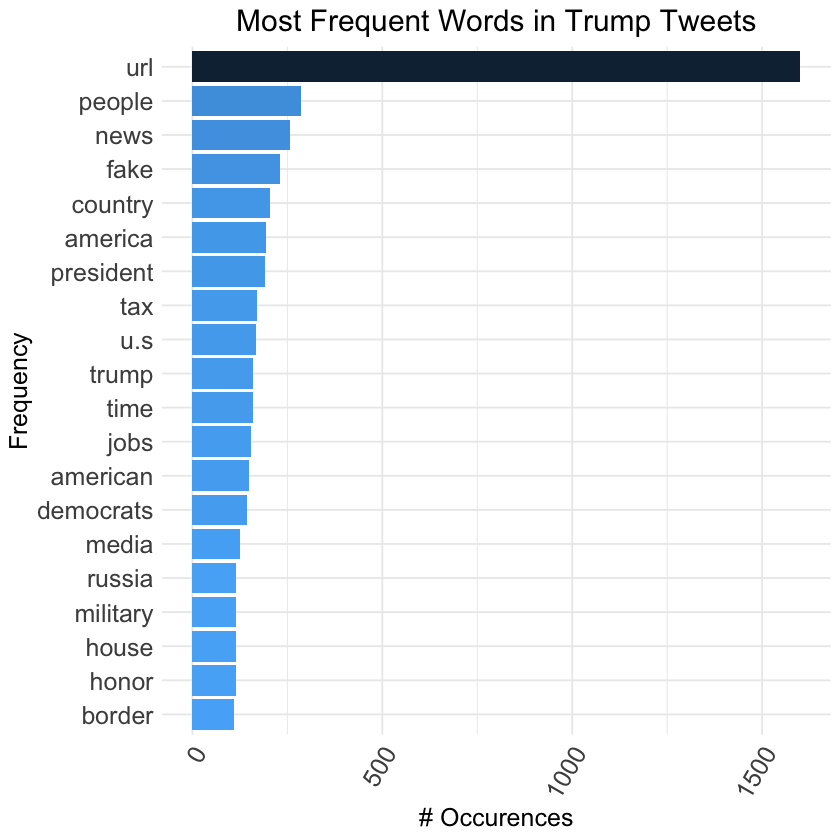

In [175]:
# count word frequencies and sort in descending order
top_words<-
   tidy_trump_tweets %>%
    count(word) %>%
        arrange(desc(n))

# plot the 20 most frequently used words
plot_frequent_words <- function(word_counts) {
    word_counts %>%
        ggplot(aes(x=n, y=reorder(word, n), fill=-n))+
          geom_bar(stat="identity")+
            theme_minimal()+
            theme(axis.text.x = element_text(angle = 60, hjust = 1, size=15),
                  axis.text.y = element_text(hjust = 1, size=15),
                  axis.title = element_text(size=15),
                  plot.title = element_text(hjust = 0.5, size=18))+
                ylab("Frequency")+
                xlab("# Occurences")+
                ggtitle("Most Frequent Words in Trump Tweets")+
                guides(fill=FALSE)
}

top_words %>%
  slice(1:20) %>%
    plot_frequent_words()

### WordCloud
Using the `wordcloud` function from the `wordcloud` package
- `min.freq`: words with frequency below min.freq will not be plotted
- `max.words`: Maximum number of words to be plotted. Least frequent terms are dropped
- `random.order`: plot words in random order. If false, they will be plotted in decreasing frequency
- `rot.per`: proportion words with 90 degree rotation
- `colors`: color words from least to most frequent
    - choose other color themes from [RColorBrewer](https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html)

Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :

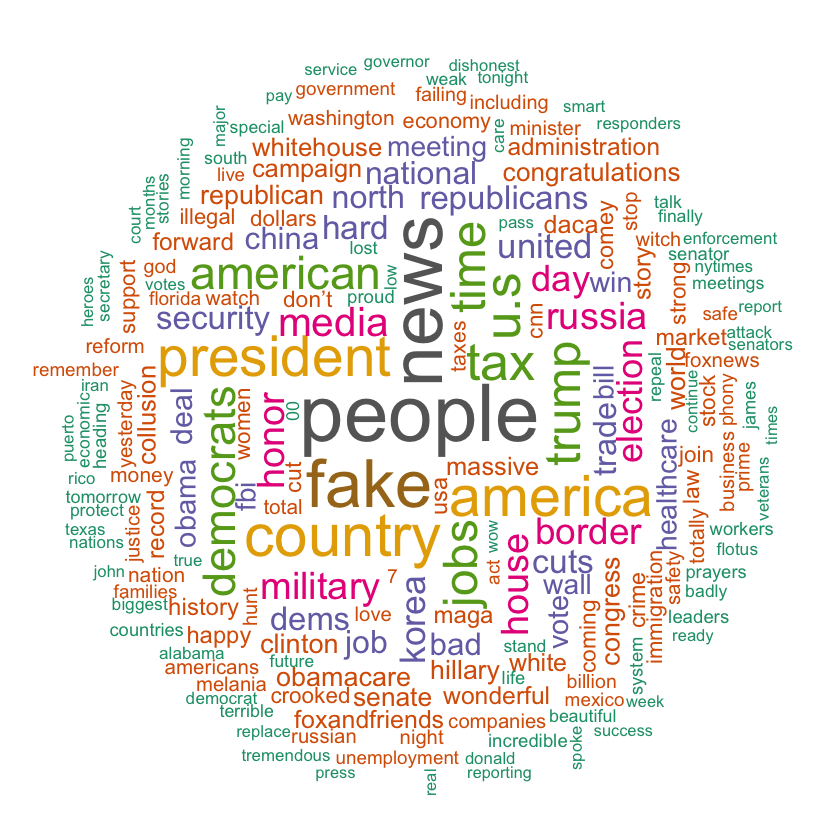

In [153]:
# generate a wordcloud 
set.seed(1234) # for reproducibility 
wordcloud(words = top_words$word, freq = top_words$n, min.freq = 1,  
          max.words=200, random.order=FALSE, rot.per=0.35,colors=brewer.pal(8, "Dark2"))

### Bigrams and n-grams
Unigrams are single words, bigrams are two-word phrases, and n-grams are n-word phrases.

We can change how the tweets are tokenized to analyze n-grams.

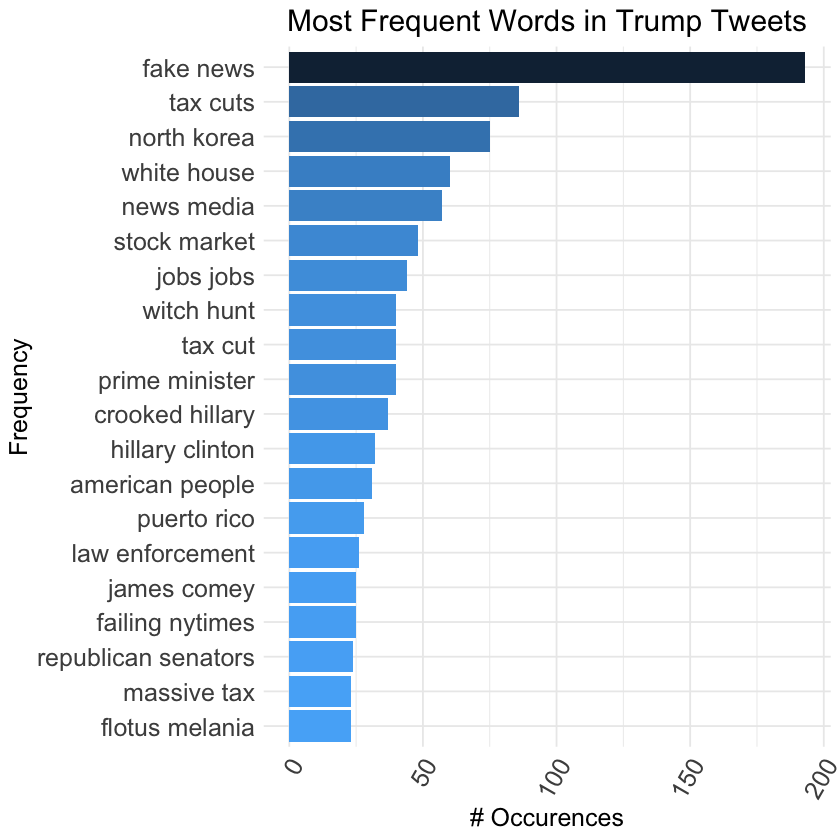

In [163]:
tidy_bigrams <-trumptweets %>%
    select(created_at,text) %>%
        unnest_tokens(output=word, input=text, token = "ngrams", n = 2) %>% 
          separate(word, c("word1", "word2"), sep = " ") %>% 
              filter(!word1 %in% custom_stop_words$word) %>%
              filter(!word2 %in% custom_stop_words$word) %>% 
                  unite(word,word1, word2, sep = " ")

top_bigrams <- tidy_bigrams %>%
    count(word) %>%
        arrange(desc(n))

top_bigrams %>%
  slice(1:20) %>%
    plot_frequent_words()

### tf-idf: Term Frequency Inverse Document Frequency
A statistic for how important a word is to a document in a collection

Words that occur more frequently in one document (tweet) and less frequently in other documents should be given more importance as they are more useful for classification.

***Term frequency***

$tf(term)=\displaystyle(\frac{n_{occurences\ of\ term\ in\ document}}{n_{words\ in\ document}})$

***Inverse document Frequency:***

$idf(term)=\displaystyle log(\frac{n_{documents}}{n_{documents\ containing\ term}})$

In [30]:
tidy_trump_tfidf <- tidy_trump_tweets %>%
    count(word, created_at) %>%
        bind_tf_idf(word, created_at, n) %>%
            arrange(desc(tf_idf))

Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'mother’s' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'mother’s' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'mother’s' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'mother’s' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'mother’s' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'mother’s' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0,

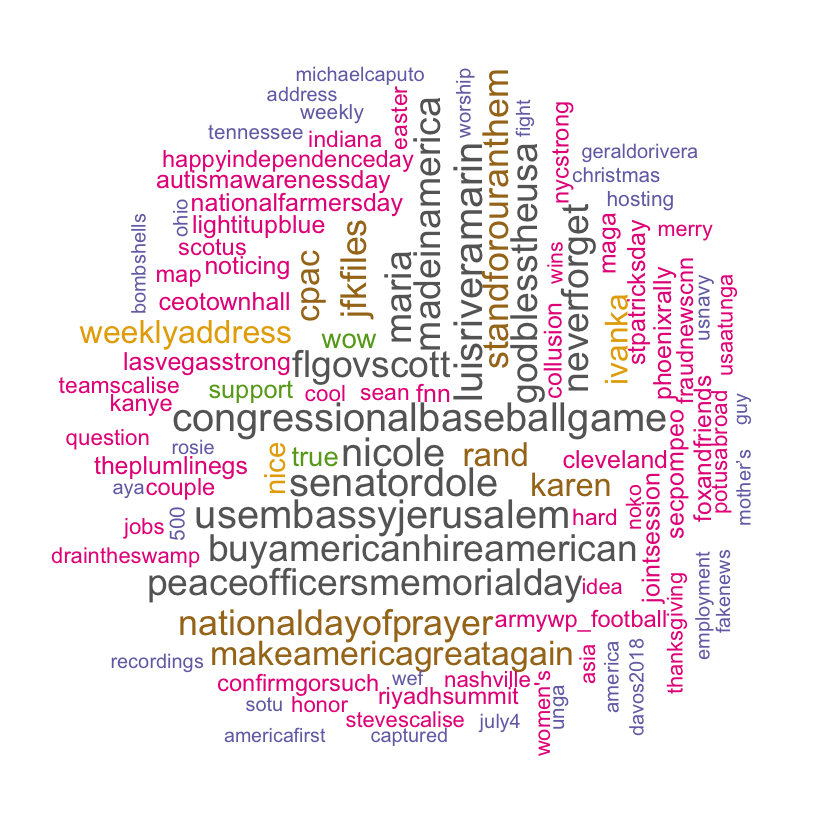

In [129]:
set.seed(1234) # for reproducibility 
tidy_trump_tfidf_unique <- tidy_trump_tfidf %>%
    distinct(word,.keep_all = TRUE)
wordcloud(words = tidy_trump_tfidf_unique$word, freq = tidy_trump_tfidf_unique$tf_idf, min.freq = .5,  
          max.words=100, random.order=FALSE, rot.per=0.35,colors=brewer.pal(8, "Dark2"),scale=c(2,.5) )

## Dictionary-based text analysis

### Selecting for a collection of words

In [123]:
topic_dictionary<-c("economy","unemployment","trade","tariffs","jobs")

In [124]:
topic_dictionary_tweets<-trumptweets[str_detect(trumptweets$text, 
                                                regex(paste(topic_dictionary, collapse="|"),
                                                      ignore_case=TRUE)),]

In [125]:
topic_dictionary_tweets

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,⋯,retweet_text,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
997233764689498112,2018-05-17 21:53:51,25073877,realDonaldTrump,Great talk with my friend President Mauricio Macri of Argentina this week. He is doing such a good job for Argentina. I support his vision for transforming his country’s economy and unleashing its potential!,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997227223638790144,2018-05-17 21:27:52,25073877,realDonaldTrump,"Talking trade with the Vice Premier of the People’s Republic of China, Liu He. url",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
996739372723638272,2018-05-16 13:09:19,25073877,realDonaldTrump,The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China...,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
996368474556583937,2018-05-15 12:35:30,25073877,realDonaldTrump,"Trade negotiations are continuing with China. They have been making hundreds of billions of dollars a year from the U.S., for many years. Stay tuned!",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
996119678551552000,2018-05-14 20:06:53,25073877,realDonaldTrump,"ZTE, the large Chinese phone company, buys a big percentage of individual parts from U.S. companies. This is also reflective of the larger trade deal we are negotiating with China and my personal relationship with President Xi.",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
995746011321597953,2018-05-13 19:22:03,25073877,realDonaldTrump,"China and the United States are working well together on trade, but past negotiations have been so one sided in favor of China, for so many years, that it is hard for them to make a deal that benefits both countries. But be cool, it will all work out!",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
995680316458262533,2018-05-13 15:01:00,25073877,realDonaldTrump,"President Xi of China, and I, are working together to give massive Chinese phone company, ZTE, a way to get back into business, fast. Too many jobs in China lost. Commerce Department has been instructed to get it done!",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
994185337504137216,2018-05-09 12:00:30,25073877,realDonaldTrump,"Congratulations to Mike Dewine on his big win in the Great State of Ohio. He will be a great Governor with a heavy focus on HealthCare and Jobs. His Socialist opponent in November should not do well, a big failure in last job!",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
994179864436596736,2018-05-09 11:38:45,25073877,realDonaldTrump,"The Fake News is working overtime. Just reported that, despite the tremendous success we are having with the economy url all things else, 91% of the Network News about me is negative (Fake). Why do we work so hard in working with the media when it is corrupt? Take away credentials?",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"


Joining, by = "word"



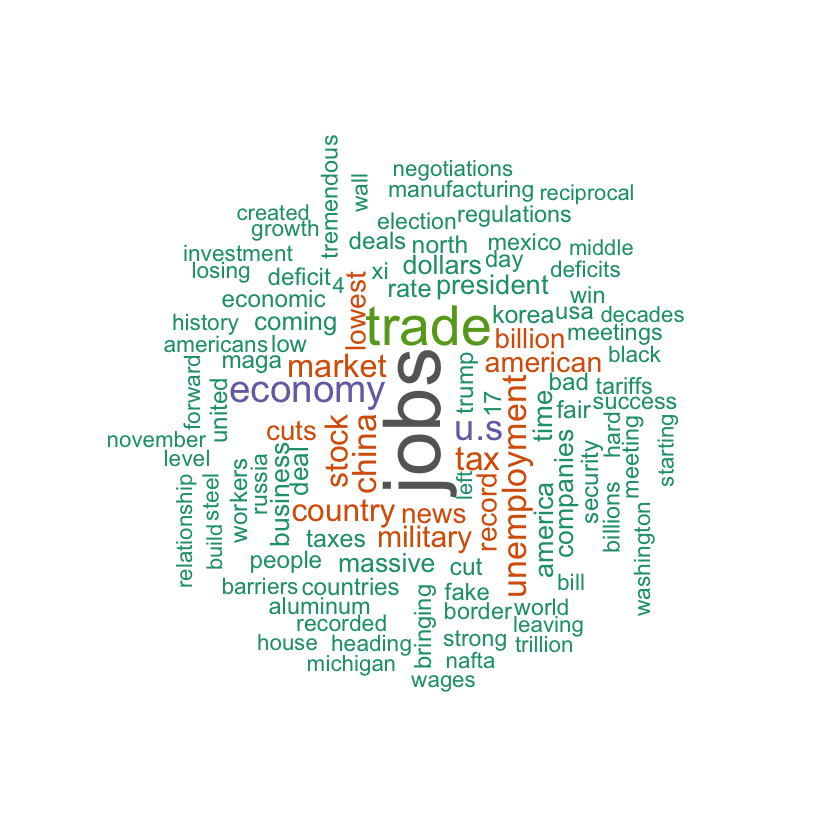

In [134]:
# plot a wordcloud for our tweets that match our topic-based dictionary
topic_top_words<-topic_dictionary_tweets %>%
    select(created_at,text) %>%
      unnest_tokens("word", text) %>%
        anti_join(stop_words) %>%
            filter(!(word=="https"|
                 word=="rt"|
                 word=="t.co"|
                 word=="amp" |
                 word=="url")) %>%
            count(word) %>%
                arrange(desc(n))
set.seed(1234) # for reproducibility 
wordcloud(words = topic_top_words$word, freq = topic_top_words$n, min.freq = 1,  
          max.words=100, random.order=FALSE, rot.per=0.35,colors=brewer.pal(8, "Dark2"),scale=c(4,1))

### Sentiment analysis